In [29]:
import pandas as pd
import numpy as np

In [78]:
def proecss(filename):
    N_280 = pd.read_excel('b280_' + filename + '.xlsx')[['time', 'Q']]
    N_6050 = pd.read_excel('6050_' + filename+'.xlsx')

    N_280['time'] = pd.to_datetime(N_280['time'])
    N_6050['time'] = pd.to_datetime(N_6050['time'])

    #280
    bins = pd.date_range(start=N_280['time'][0], end='2021-08-24 22:31:00.000', freq='10S')
    labels = [i for i in range(len(bins) - 1)]
    N_280['time_group'] = pd.cut(N_280['time'], bins=bins, right=False, labels=labels)
    N_6050['time'][0], N_6050['time'][N_6050.shape[0]-1]
    #6050_1
    bins = pd.date_range(start=N_6050['time'][0] , end='2021-08-24 22:31:00.000', freq='10S')
    labels = [i for i in range(len(bins) - 1)]
    N_6050['time_group'] = pd.cut(N_6050['time'], bins=bins, right=False, labels=labels)
    #分组
    N280 = pd.DataFrame.groupby(N_280, by=['time_group'])
    N6050 = pd.DataFrame.groupby(N_6050, by=['time_group'])

    assert len(N280) == len(N6050)

    data = []
    label = []
    for i in range(0, len(N280)):
        data.append( pd.concat([N6050.get_group(i).drop(columns=['time']).reset_index(drop=True), 
            N280.get_group(i).drop(columns=['time']).reset_index(drop=True)], axis=1))
        label.append(i % 6)
    data = [d[['X', 'Y', 'Z', 'RX', 'RY', 'RZ', 'Q']] for d in data]
    data = [d.dropna(axis=0) for d in data]
    
    Bigdata = np.full((len(data), 500, 7), np.nan)
    for i in range(len(data)):
        length = data[i].shape[0]
        Bigdata[i,0:length,:] = data[i].values
    Bigdata = Bigdata.astype(np.float32)
    label = np.array(label).astype(np.int32)
    return Bigdata, label

In [79]:
X ,y = proecss('L3')

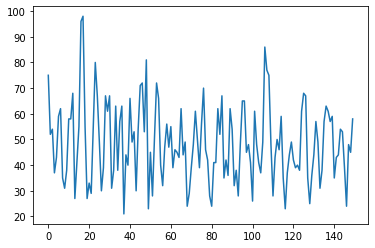

In [81]:
import matplotlib.pyplot as plt
num = np.isnan(X).all(axis=2).astype(np.int32).sum(axis=1)
plt.plot(range(150), num)

In [77]:
np.savez('L3.npz',X = Bigdata, y= label)

In [83]:
np.unique(y, return_counts=True)


(array([0, 1, 2, 3, 4, 5]), array([25, 25, 25, 25, 25, 25], dtype=int64))

In [ ]:
#合并
max_length = 0
b = 0 
for i in range(1,5):
    X = np.load(str(i) +'.npz')['X']
    length = X.shape[1]
    if length > max_length:
        max_length = length
    b += X.shape[0]
    print(b)

In [ ]:
max_length, b

In [ ]:
Bigdata = np.full((636, 479, 7), fill_value=np.nan)
Biglabel = np.full((636,) , fill_value=np.nan)

In [ ]:
data = np.load('1.npz')
X, y = data['X'], data['y']
for i in range(X.shape[0]):
    length = X[i].shape[0]
    Bigdata[i,0:length,:] = X[i]
    Biglabel[i] = y[i]

In [ ]:
(~np.isnan(Biglabel)).astype(np.int32).sum()

In [ ]:
data = np.load('2.npz')
X, y = data['X'], data['y']
bias = 186
for i in range(X.shape[0]):
    length = X[i].shape[0] 
    Bigdata[i+bias,0:length,:] = X[i]
    Biglabel[i+bias] = y[i]

In [ ]:
(~np.isnan(Biglabel)).astype(np.int32).sum(), y.shape, X.shape

In [ ]:
data = np.load('3.npz')
X, y = data['X'], data['y']
bias = 336
for i in range(X.shape[0]):
    length = X[i].shape[0] 
    Bigdata[i+bias,0:length,:] = X[i]
    Biglabel[i+bias] = y[i]

In [ ]:
(~np.isnan(Biglabel)).astype(np.int32).sum(), y.shape, X.shape

In [ ]:
data = np.load('4.npz')
X, y = data['X'], data['y']
bias = 486
for i in range(X.shape[0]):
    length = X[i].shape[0] 
    Bigdata[i+bias,0:length,:] = X[i]
    Biglabel[i+bias] = y[i]

In [ ]:
(~np.isnan(Biglabel)).astype(np.int32).sum(), y.shape, X.shape

In [ ]:
np.savez('final.npz', X = Bigdata.astype(np.float32), y = Biglabel.astype(np.int32))

In [ ]:
import numpy as np 
data = np.load('final.npz')['y']

In [ ]:
data